In [1]:
# imports
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [72]:
# clean and normalize data
curr_dir = os.getcwd()
project_dir = os.path.dirname(os.path.dirname(curr_dir))
data_dir = "".join([project_dir, '\data\investigation_train_large_checked.csv'])
df = pd.read_csv(data_dir, encoding='ISO-8859-1')
# df.head()

english_names_dir = "".join([project_dir, '\data\data_description.csv'])
names_df = pd.read_csv(english_names_dir, encoding='ISO-8859-1')
name_mapping = dict(zip(names_df['Feature (nl)'], names_df['Feature (en)']))

# Rename the columns in the `df` DataFrame
df.rename(columns=name_mapping, inplace=True)

# Check the updated column names
df.head()

,address_number_personal_records_database_addresses,address_number_different_districts,address_number_mail_address,address_number_residential_address_manual,address_days_at_address,address_latest_part_rotterdam,address_latest_neighborhood_groot_ijsselmonde,address_latest_neighborhood_new_westen,address_latest_neighborhood_other,address_latest_neighborhood_olde_north,...,type_hist_ind,type_hist_care_sector,type_ind,type_indication_secret_data,type_other,type_transport_logistics_horticulture,type_care_cleaning_wellbeing,Ja,Nee,checked
0,1,1,0,0,23240,1,0,0,0,0,...,1,0,0,0,0,0,0,0.617698,0.382302,False
1,4,2,1,1,1971,1,0,0,1,0,...,1,0,1,0,1,0,0,0.602167,0.397833,False
2,6,4,2,1,7247,0,0,0,1,0,...,1,0,1,0,0,0,0,0.512377,0.487623,False
3,3,2,0,1,8060,1,0,0,1,0,...,1,0,0,0,0,0,0,0.717796,0.282204,True
4,3,2,0,0,18705,1,0,0,0,0,...,1,0,1,0,0,0,0,0.705484,0.294516,True


In [12]:
data = names_df.sort_values(by="Relative importance", ascending=False)
top_10 = data.head(10)

def raw_values(pct, all_vals):
    absolute = int(round(pct/100.*sum(all_vals), 2))
    return f'{absolute}'

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

top_10['Relative importance'] = top_10['Relative importance']/top_10['Relative importance'].sum()
top_10
# 
# # Plot pie chart
# plt.figure(figsize=(8, 8))
# plt.pie(
#     top_10["Relative importance"], 
#     labels=top_10["Feature (en)"], 
#     autopct=lambda pct: f'{pct * sum(top_10["Relative importance"]) / 100:.1f}',
#     startangle=140
# )
# plt.title("Top 10 Features by Relative Importance")
# plt.show()

C:\Users\chena\AppData\Local\Temp\ipykernel_39852\2391059117.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10['Relative importance'] = top_10['Relative importance']/top_10['Relative importance'].sum()


,ID,Feature (nl),Feature (en),Datatype,Relative importance,Variable description,Additional explanation
216,217,persoon_leeftijd_bij_onderzoek,person_age_at_investigation,int,0.323964,Age of the customer at the time of the investi...,NaN
290,291,relatie_overig_actueel_vorm__kostendeler,relationship_other_current_form_cost_sharer,int,0.114961,Summation of the number of other relationships...,NaN
140,141,contacten_onderwerp_no_show,contacts_subject_no_show,int,0.090304,Number of contacts that a customer has had wit...,NaN
90,91,competentie_vakdeskundigheid_toepassen,competence_expertise_apply,int,0.081336,Number of current competencies of the customer...,NaN
142,143,contacten_onderwerp_overleg_met_inkomen,contacts_subject_consultation_with_income,int,0.078080,Number of contacts that a customer has had wit...,NaN
4,5,adres_dagen_op_adres,address_days_at_address,int,0.075578,Number of days a customer lives at the current...,NaN
299,300,relatie_overig_kostendeler,relationship_other_cost_sharer,int,0.067219,Whether the customer currently has another rel...,NaN
276,277,pla_historie_ontwikkeling,pla_history_development,int,0.061914,Whether the customer has ever had an action pl...,NaN
181,182,instrument_ladder_huidig_activering,instrument_ladder_current_activation,int,0.056709,Current number of instruments deployed on beha...,NaN
155,156,contacten_soort_afgelopenjaar_document__uitgaand_,contacts_type_last_year_document_outgoing,int,0.049935,Number of contacts that a customer has had wit...,NaN


C:\Users\chena\AppData\Local\Temp\ipykernel_39852\283306613.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = data.groupby('Bins')['Counts'].sum()


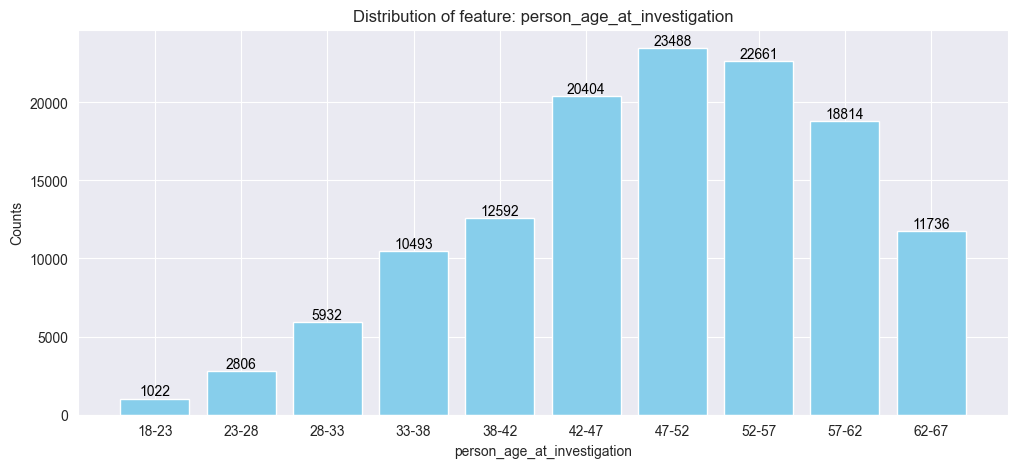

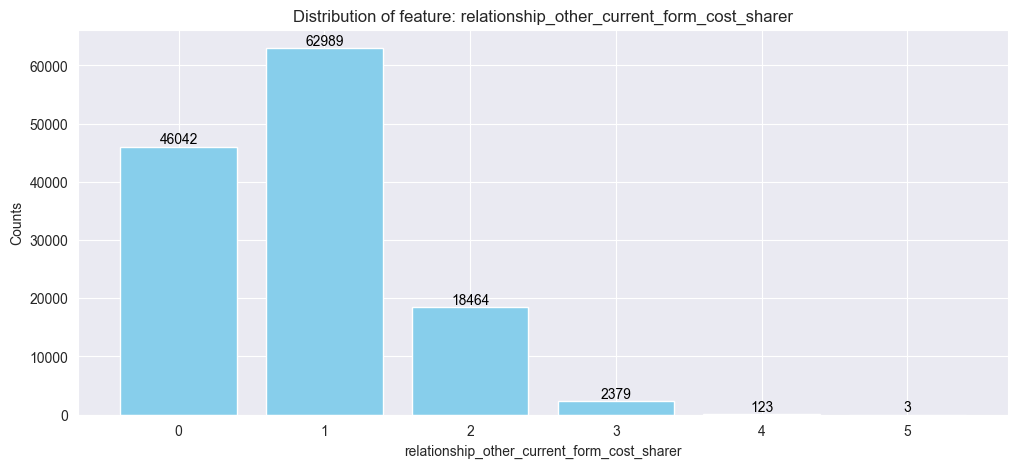

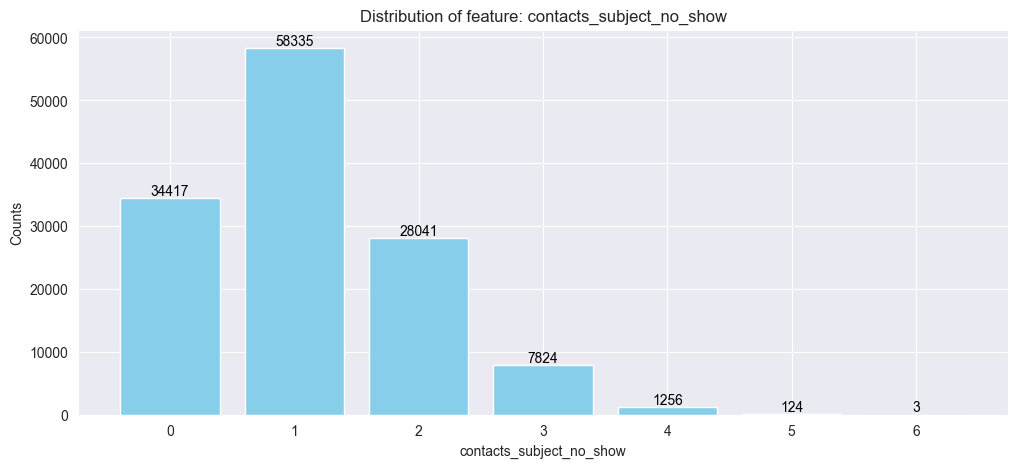

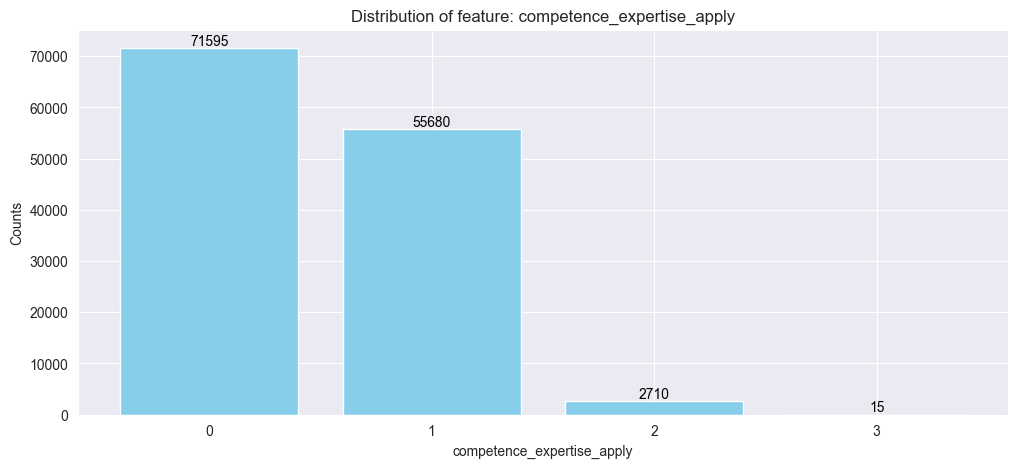

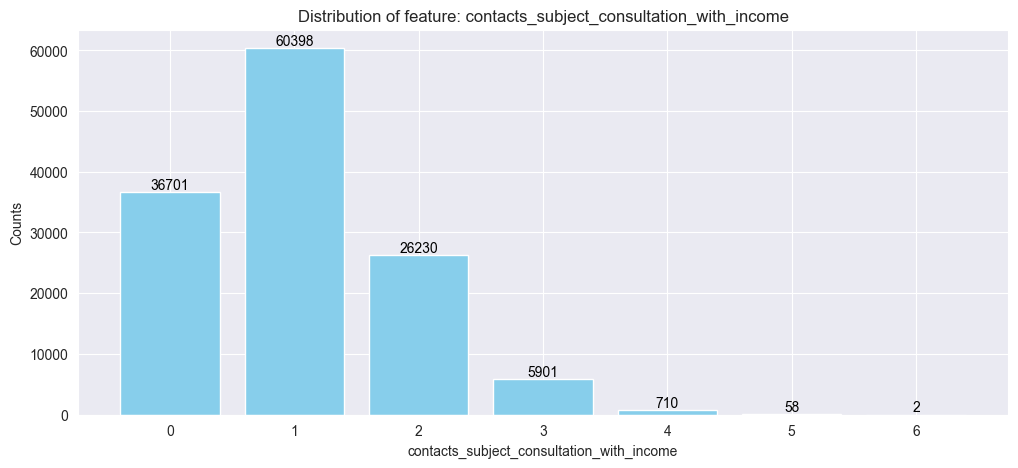

C:\Users\chena\AppData\Local\Temp\ipykernel_39852\283306613.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = data.groupby('Bins')['Counts'].sum()


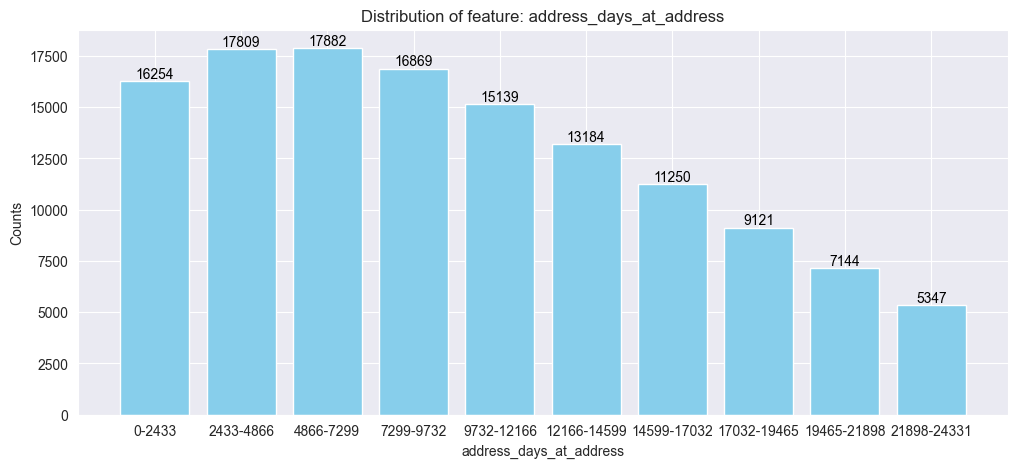

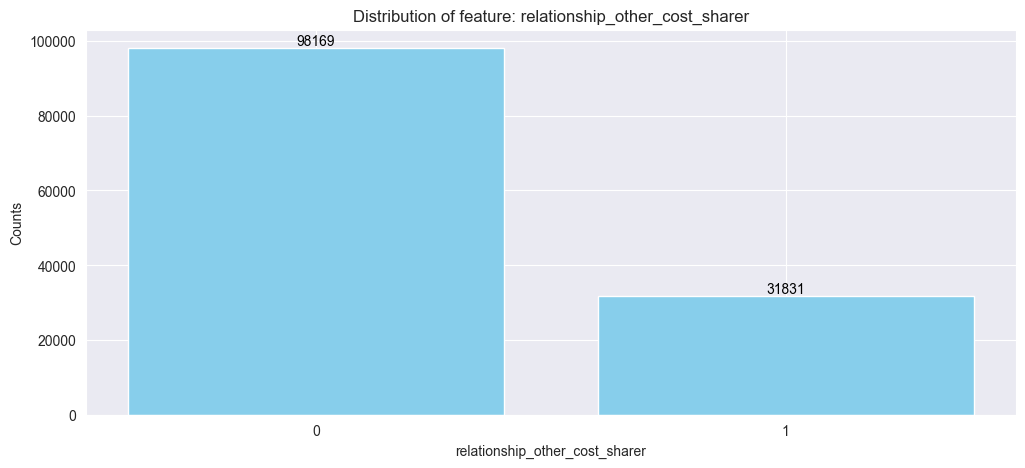

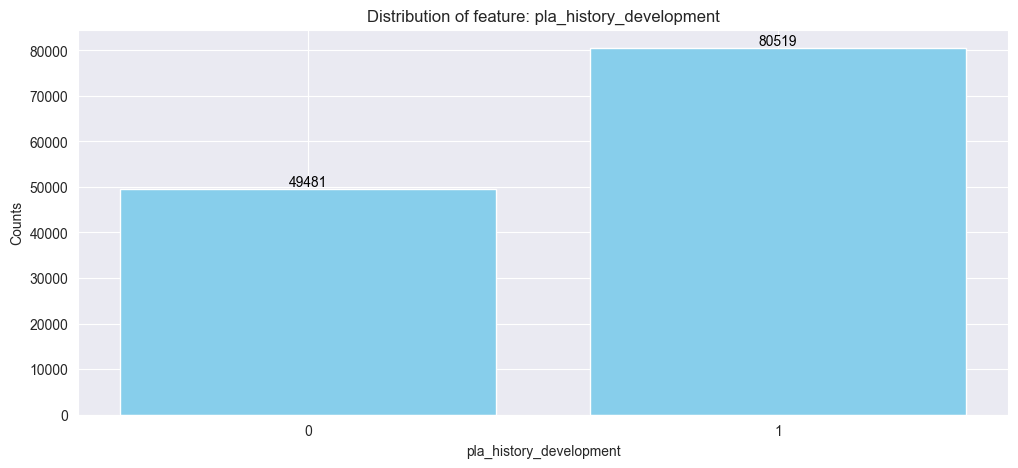

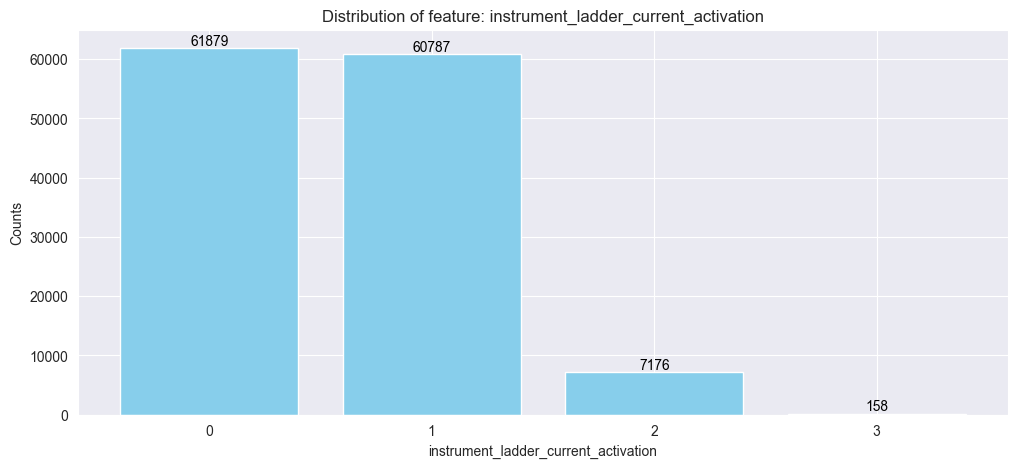

C:\Users\chena\AppData\Local\Temp\ipykernel_39852\283306613.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = data.groupby('Bins')['Counts'].sum()


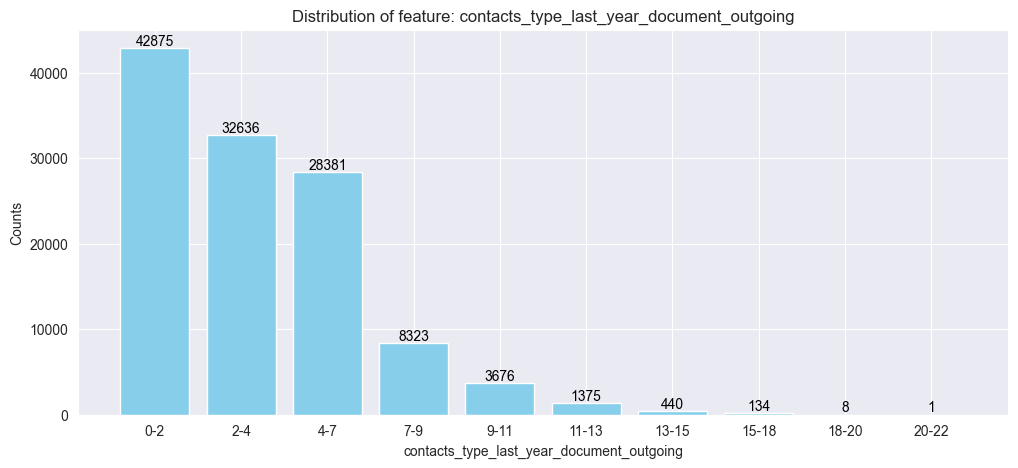

In [91]:
def plot_distribution(col, feature):
    col = col.sort_values()
    value_counts = col.value_counts(ascending=True)
    
    values = value_counts.index.tolist()  # Unique values
    counts = value_counts.values.tolist()  # Counts of each value
    
    sorted_values_counts = sorted(zip(values, counts))  # Sort pairs by values
    sorted_values, sorted_counts = zip(*sorted_values_counts)
    
    sorted_values = list(sorted_values)
    sorted_counts = list(sorted_counts)
    
    if(len(sorted_values) >= 10):
        # Combine values and counts into a DataFrame
        data = pd.DataFrame({'Values': sorted_values, 'Counts': sorted_counts})
        
        # Create 10 bins
        bins = np.linspace(min(values), max(values), 11)  # 10 bins means 11 edges
        bins = [int(round(num)) for num in bins]
        data['Bins'] = pd.cut(data['Values'], bins=bins, include_lowest=False)
        
        # Aggregate counts by bins
        binned_data = data.groupby('Bins')['Counts'].sum()
        
        # Convert binned data for plotting
        binned_values = [f"{int(round(interval.left))}-{int(round(interval.right))}" for interval in binned_data.index]
        binned_counts = binned_data.values
            
        # Create the bar chart
        plt.figure(figsize=(12, 5))  # Width: 10, Height: 5
        plt.bar(binned_values, binned_counts, color='skyblue')
        plt.xticks(binned_values)  # This ensures only the existing values are displayed
        
        # Overlay count labels
        for i, count in enumerate(binned_counts):
            plt.text(binned_values[i], count + 1,  # Position slightly above the bar
                     str(count),                # Text to display
                     ha='center',               # Center the text horizontally
                     va='bottom',               # Align text to the bottom
                     fontsize=10,               # Font size
                     color='black')             # Text color
    else:
        # Create the bar chart
        plt.figure(figsize=(12, 5))  # Width: 10, Height: 5
        plt.bar(sorted_values, sorted_counts, color='skyblue')
        plt.xticks(sorted_values)  # This ensures only the existing values are displayed
        
        # Overlay count labels
        for i, count in enumerate(sorted_counts):
            plt.text(sorted_values[i], count + 1,  # Position slightly above the bar
                     str(count),                # Text to display
                     ha='center',               # Center the text horizontally
                     va='bottom',               # Align text to the bottom
                     fontsize=10,               # Font size
                     color='black')             # Text color
        
    # Add labels and title
    plt.xlabel(feature)
    plt.ylabel('Counts')
    plt.title('Distribution of feature: ' + feature)

    # Show the plot
    plt.show()

for feature in top_10['Feature (en)']:
    plot_distribution(df[feature], feature)